<h1 style='font-size:4rem;color:orange;'>Math 267 Project #1

<hr>
In this jupyter/colab notebook we will show how to implement Euler's method using the python programming language. The emphasis will be more on code readability than efficiency.


If you have any difficulty you can share your notebook with me at   rm908@email.vccs.edu. Send me an email informing you have shared the notebook and where you problem is.


# Euler's Method

The ability to obtain a formulaic solution for an ODE is the exception rather than the rule. The majority
of the time we resort to finding a “numerical solution” where the time axis is discretized. The numerical
solution will yield a list of points {(t0, y0), (t1, y2), (t3, y3), (t4, y4) ... ....} which ideally lie along the solution
curve. Please consult section 2.6 in the text  for further details on  Euler’s method.

Now to solve the initial value problem:

$$y'=f(t,y)$$
$$y(t_0)=y_0$$

using Euler's method we simply iterate the following:

$$t_{n+1} = t_n + \Delta t$$
$$y_{n+1} = y_n + f(t_n,y_n)\cdot \Delta t$$

where $\Delta t$ is the "step size". We often use the letter "h" to represent the step size. Also recall that $f(t,y)$ is the "slope field" for the differential equation. Also note for this example that the letter "y" is being used to represent the dependent variable and "t" for the indepentent varialbe.

## Exercise #1

### For our first exercise we use Euler's method to solve the following initial value problem.

$$y' = -y +t$$
$$y(0) = 0.5$$

### Solve on interval $[0,1.2]$ and use h = 0.1.


Execute the cell below to load necessary libraries.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

### The python code to numerically solve the above ode is in the cell below. Hopefully this code looks familiar from our in class lecture on Euler's method.  Read and make sure you understand the code.  If you need help on any python command just enter

```python
? <command name>
```
### in an empty cell.

Execute the cell below.

In [6]:
# define slope function

def f(t,y):
    return -y + t

h = 0.1

# We first "discretize" the domain.  The array t holds the t values

t = np.arange(0,1.3,h) 
y_euler = np.zeros_like(t)  # initialize y array to zeros
y_euler[0] = 0.5 # set the intial value

# implement Euler's method

for i in range(len(y_euler)-1):
    y_euler[i+1] = y_euler[i] + f(t[i],y_euler[i])* h
    

## Visualize results
### To visualize the results in table form execute the following cell. It is not necessary to understand the python code below that generates the table.

In [7]:
# the exact solution of the ode is defined by the function below

def y_e(t):
    return 1.5*np.exp(-t)-1+t

y_exact = y_e(t) # compute exact values

# Now display results in a table

df = pd.DataFrame({"t":t,"y_exact":y_exact,"y_Euler":y_euler})
df

,t,y_exact,y_Euler
0,0.0,0.500000,0.500000
1,0.1,0.457256,0.450000
2,0.2,0.428096,0.415000
3,0.3,0.411227,0.393500
4,0.4,0.405480,0.384150
5,0.5,0.409796,0.385735
6,0.6,0.423217,0.397162
7,0.7,0.444878,0.417445
8,0.8,0.473993,0.445701
9,0.9,0.509854,0.481131


### To compute percent error for our results we use the formula:

$$ \frac{(y_{exact} - y_{euler})}{y_{exact}}\times100\%  $$

### Execute the following cell to compute and display the percent error in approximating $y(1)$ for the previous example. Your answer should be about 1.6%.

In [8]:
# For the above ode the % difference when computing y(1) is:
error = np.abs(y_exact[1]-y_euler[1])/y_exact[1]*100
print(f"The error is {round(error,2)}%.")

The error is 1.59%.


## Exercise 1.a

### One way to improve the result is by decreasing the value of h. Go back and reexecute the code in the previous cells  with h changed to 0.05. Compute the percent error for y(1) and make a record of your result. 

### Now reset the value of h back to h=0.1 and reexecute the cells so we can graph our results.

## Plot the results
### The code in the cell below will make a plot of the exact and approximate solutions. Execute the cell below to see the plot.

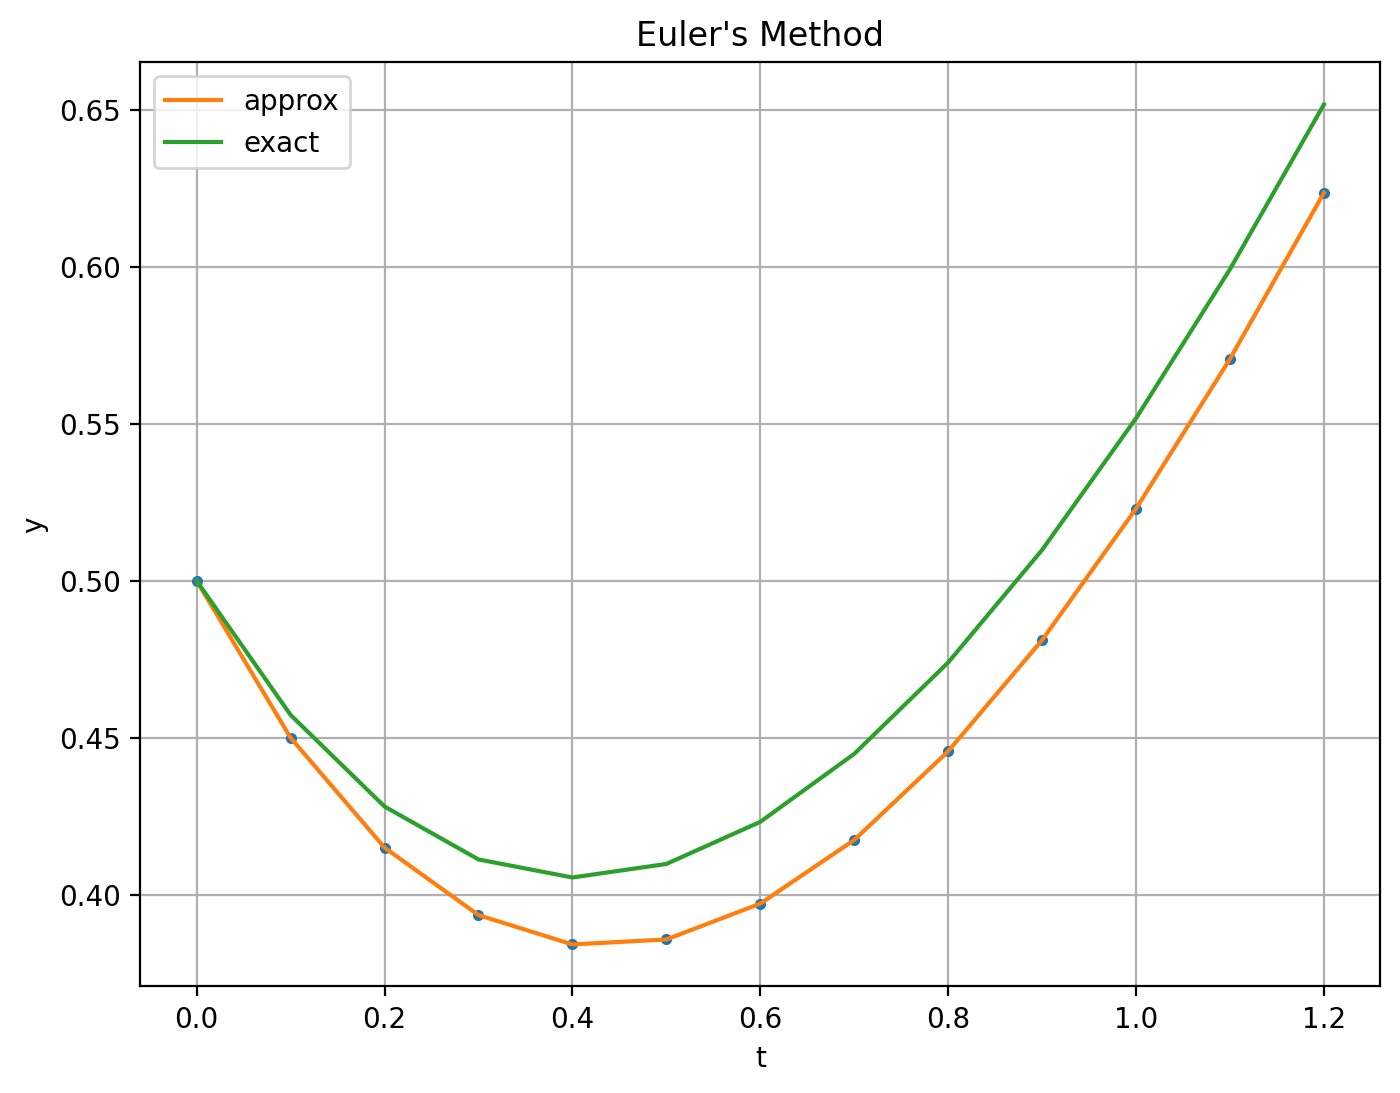

In [5]:
plt.figure(figsize=(8,6))
plt.plot(t,y_euler,'.')
plt.plot(t,y_euler,label='approx')

plt.plot(t,y_exact,label='exact')
plt.legend();
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler's Method");

# To save a copy of the plot to a file uncomment the following. To uncomment just remove the hashtag.  Note you must have your drive mounted.
#plt.savefig("euler.png",dpi=300)

# Improved Euler's Method

Euler’s method, while nice in its simplicity, is too inaccurate and slow for practical use. Euler’s method predicts the next point $(t_{n+1},y_{n+1})$ on the solution curve by computing the slope $f (t, y)$ of the solution curve at the point $(t_n,y_n)$, this is determined by evaluating the slope field at that point -- slope =
$f(t_n, y_n)$.
The improved Euler’s method predicts the next point by computing two slopes and using their average as our final slope value. The two slopes computed are
slope1 = $f (t_n, y_n)$ and slope2 = $f (t_{n+1}, y^*_{n+1})$ . Thus we first need to predict the next value $y^*_{n+1}$ using the
standard Euler procedure. Next slope2, the estimation of the slope at the end point of the interval $[t_n, t_{n+1}]$ is computed. Finally we compute our ultimate estimation for the slope by taking the average of the two: slope = (f (tn, yn) + f (tn+1, y*n+1) / 2. This slope then is used to determine the next point in our solution$(t_{n+1}, y_{n+1})$ and the steps are repeated. Got that?

The iteration formulas for the improved Euler's method are thus given by:

$$t_{n+1} = t_n + \Delta t$$

$$y_{n+1} = y_n + \frac{(f(t_n,y_n)+f(t_{n+1},y^*_{n+1}))}{2}\cdot \Delta t$$

where
$$y^*_{n+1} = y_n +f(t_n,y_n)\cdot \Delta t$$




## Exercise #2

### For our second exercise we will use  the impoved Euler's method to solve the following initial value problem.

$$y' = -y +t$$
$$y(0) = 0.5$$

### Solve on interval $[0,1.2]$ and use h = 0.1.


<hr>

The suggested algorithm for implementing the improved Euler method is:

1. Define the slope function.
2. Set the value of h.
3. Intialize the array of time values. We call the array "t".
4. Intialize the y_improved array to zeros.
5. Set the initial condition for y_improved.
6. Repeat the following:<br>
    Compute slope1 using slope1=$f(t_n,y_n)$<br>
    Compute $y^*_{n+1}$<br>
    Compute slope2 using slope2=$f(t_{n+1},y^*_{n+1})$<br>
    Define slope = (slope1+slope2)/2<br>
    Compute $y_{n+1}=y_n+\text{slope} \cdot h$
<hr>

## Exercise 2.a


### The code that implements Euler's method is copied in the cell below.  Edit this code to implement the improved Euler's method. Note you need to rename the variable y_euler to y_improved.

In [98]:
# define slope function

def f(t,y):
    return -y + t

h = 0.1

# We first "discretize" the domain.  The array t holds the t values

t = np.arange(0,1.3,h) 
y_euler = np.zeros_like(t)  # initialize y array to zeros
y_euler[0] = 0.5 # set the intial value

# implement Euler's method

for i in range(len(y_euler)-1):
    y_euler[i+1] = y_euler[i] + f(t[i],y_euler[i])* h
    

### Now let us see the results in table form.  Uncomment and execute the cell below. Remove hashtags to uncomment a line.

In [7]:
#df = pd.DataFrame({"t":t,"y_exact":y_exact,"y_Euler":y_euler,"y_Impoved":y_improved});
#df

### Let us now compute the percent error for $y(1)$.  Uncomment the cell below and execute. Hint: your answer should be less that $0.1$%. This result will be entered into gradescope.

In [8]:
#error = np.abs(y_exact[1]-y_improved[1])/y_exact[1]*100
#print(f"Using the improved Euler method the percent error is {round(error,2)}%.")


<h4> Execute the cell below to see a plot of the comparison between y_exact and y_improved. Look closely the curves could lie on top of one another. Save this plot to be uploaded to gradescope. Change the title to read "Improved Euler's Method by your name".

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(t,y_improved,'.')
plt.plot(t,y_improved,label='improved')

plt.plot(t,y_exact,label='exact')
plt.legend();
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Improved Euler's Method");

# To save a copy of the plot to a file uncomment the following.  Note you must have your drive mounted.
#plt.savefig("euler.png",dpi=300)

<hr>

## Exercise #3

For the final exercise you are to use the improved Euler’s method to obtain the approximate value of y(1.5) for the solution of the initial value problem

$$y ' = 2 xy, y(1) = 1$$

Use h = 0.1. Analytically compute the exact value and compute the percent error.


In [ ]:
# In this cell enter the necessary code to compute y(1.5) using the improved Euler's method. Hint: copy your previous code to this cell and edit it
# accordingly





### Next solve the ode and determine the value y(1.5)
This step is not done using python.  Here you have to solve the ode.  Note this equation is separable.

In [ ]:
# Enter the necessary code in this cell to compute the percent error and display the % error for the previous problem.  Copy and edit the code
# used earlier






